In [1]:
import pickle
from ggplot import *
import pandas as pd
import numpy as np
% matplotlib inline

/Users/zhiwei/anaconda3/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/zhiwei/anaconda3/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/zhiwei/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# load data

alldata_new = pickle.load(open('output/dtm_processed_output.p', 'rb'))
doctitles=alldata_new['docnames']
doc_year=alldata_new['docs_per_year']
doc_ids =[0]+list(np.cumsum(doc_year))

term_topic = alldata_new['term_topic']# term_topic is n_years*n_topics*n_terms
terms = alldata_new['terms']
term_frequency = alldata_new['term_frequency'][1:] # weirdly the first entry is empty
doc_topicyrs = alldata_new['doc_topic']

doc_topic = []
doc_length=[]
for year in range(len(term_topic)):    
    doc_topic.append(alldata_new['doc_topic'][doc_ids[year]:doc_ids[year+1]])# doc_topic is nyear*n_docs given year*n_topics
    doc_length.append(alldata_new['doc_length'][doc_ids[year]:doc_ids[year+1]]) #doc_length is nyear*n_docs given year"""    
# rename topics by the hand-picked names
topic_labels = pickle.load(open('topicnames.p','rb'))
    

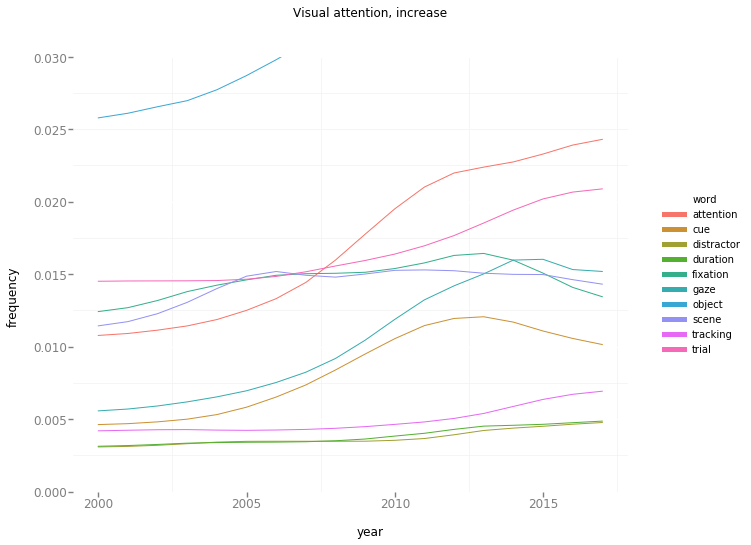

In [7]:
for topic_num in range(20):
    topic_np = term_topic[:,topic_num,:]

    incidx = np.argsort(-topic_np[-1,:]+topic_np[0,:])[:10]
    decidx = np.argsort(topic_np[-1,:]-topic_np[0,:])[:10]
    incwords = topic_np[:,incidx]
    decwords = topic_np[:,decidx]
    
    dfinc = pd.DataFrame(incwords, columns=np.array(terms)[incidx])
    dfinc['year'] = range(2000, 2018)
    dfinc = dfinc.melt(id_vars=['year'], var_name='word', value_name='frequency')
    
    dfdec = pd.DataFrame(decwords, columns=np.array(terms)[decidx])
    dfdec['year'] = range(2000, 2018)
    dfdec = dfdec.melt(id_vars=['year'], var_name='word', value_name='frequency')
    p = ggplot(aes(x='year', y='frequency', color='word'), data=dfdec) +labs(title =topic_labels[topic_num]+', decrease') + geom_line() + scale_x_continuous(breaks=[2000, 2005, 2010, 2015]) + ylim(0,0.03) + theme_bw()
    p.save(filename='figures/topic_term_risefall/%s_decterms.png'%topic_labels[topic_num])
    
    p = ggplot(aes(x='year', y='frequency', color='word'), data=dfinc)+labs(title =topic_labels[topic_num]+', increase') + geom_line() + scale_x_continuous(breaks=[2000, 2005, 2010, 2015]) + ylim(0,0.03)+ theme_bw()
    p.save(filename='figures/topic_term_risefall/%s_incterms.png'%topic_labels[topic_num])
